In [1]:
# Importing functions and packages
import pandas as pd
import warnings
import numpy as np
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import balanced_accuracy_score
warnings.filterwarnings('ignore')

# Loading data and processing

In [2]:
df=pd.read_csv("data.csv", sep='delimiter', header=None, encoding='latin1')

In [3]:
df = df[0].str.split(';', expand=True)

In [4]:
df

,0,1,2
0,"Our friends won't buy this analysis, let alone...",1,None
1,One more pseudo generalization and I'm giving up.,1,None
2,One more pseudo generalization or I'm giving up.,1,None
3,"The more we study verbs, the crazier they get.",1,None
4,Day by day the facts are getting murkier.,1,None
...,...,...,...
8546,Poseidon appears to own a dragon,0,None
8547,Digitize is my happiest memory,0,None
8548,It is easy to slay the Gorgon.,1,None
8549,I had the strangest feeling that I knew you.,1,None


In [5]:
# Removing the column 2 that contains None values
df=df.drop([2],axis=1)

In [6]:
df

,0,1
0,"Our friends won't buy this analysis, let alone...",1
1,One more pseudo generalization and I'm giving up.,1
2,One more pseudo generalization or I'm giving up.,1
3,"The more we study verbs, the crazier they get.",1
4,Day by day the facts are getting murkier.,1
...,...,...
8546,Poseidon appears to own a dragon,0
8547,Digitize is my happiest memory,0
8548,It is easy to slay the Gorgon.,1
8549,I had the strangest feeling that I knew you.,1


In [7]:
data=df[df[1].isin(['0','1'])]

In [8]:
data[1].value_counts()/len(data)

1
1    0.704224
0    0.295776
Name: count, dtype: float64

The data is imbalanced, we should be careful when we interpret the results of performance.

In [9]:
data=data.rename(columns={0:'text',1:'label'})

In [ ]:
data

,text,label
0,"Our friends won't buy this analysis, let alone...",1
1,One more pseudo generalization and I'm giving up.,1
2,One more pseudo generalization or I'm giving up.,1
3,"The more we study verbs, the crazier they get.",1
4,Day by day the facts are getting murkier.,1
...,...,...
8546,Poseidon appears to own a dragon,0
8547,Digitize is my happiest memory,0
8548,It is easy to slay the Gorgon.,1
8549,I had the strangest feeling that I knew you.,1


In [8]:
pip install spacy

In [10]:
pip install spacy==3.6.0

In [11]:
!python -m spacy download en_core_web_sm

2024-05-13 09:50:09.640377: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-13 09:50:09.640505: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-13 09:50:09.642571: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-13 09:50:13.589144: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 22.4 MB/s eta 0:00:00
  Attempting uninstall: en-core-web-sm
    Found existing installation: en-core-web-sm 3.7.1
    Uninstalling en-core-web-sm-3.7.1:
      Successfully uninstall

# Tokenization and encoding

In [15]:
import spacy

In [19]:
# Loading the pretrained model spaCy for english, suitable for understanding the grammatical structure of english phrases.
nlp = spacy.load("en_core_web_sm")

In [20]:
def custom_tokenizer(text):
    tokens = []
    doc = nlp(text)
    for token in doc:
        # Ignoring punctuation and spaces
        if not token.is_punct and not token.is_space:
            tokens.append(token.text)
    return tokens

In [21]:
tfidf_vectorizer = TfidfVectorizer(tokenizer=custom_tokenizer)
X = tfidf_vectorizer.fit_transform(data['text'])

In [22]:
y=data['label']

In [23]:
y=y.astype(float)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, random_state=42)

# XGBoost Classification model

In [25]:
model = xgb.XGBClassifier()

In [26]:
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [33]:
y_pred=model.predict(X_test)

In [34]:
balanced_acc = balanced_accuracy_score(y_test, y_pred)
print('Balanced Accuracy: {} / Accuracy: {}'.format(
    round(balanced_acc, 3), round((y_pred==y_test).sum()/len(y_pred), 3)))

Balanced Accuracy: 0.528 / Accuracy: 0.694


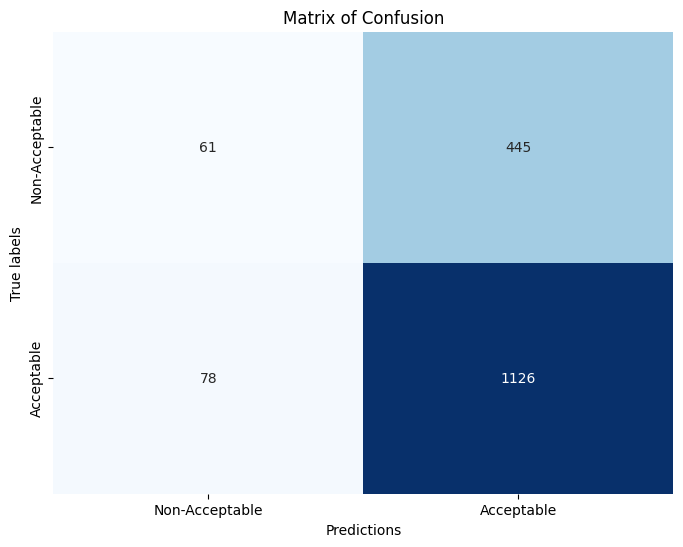

In [35]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Non-Acceptable", "Acceptable"],
            yticklabels=["Non-Acceptable", "Acceptable"])
plt.xlabel("Predictions")
plt.ylabel("True labels")
plt.title("Matrix of Confusion")
plt.show()

In [30]:
non_acceptable_ratio=61/(61+445)
acceptable_ratio=1126/(78+1126)

In [32]:
print(round(non_acceptable_ratio,3))
print(round(acceptable_ratio,3))

0.121
0.919
